# Part I: Research Question

### A.  Describe the purpose of your data mining report by doing the following:

#### 1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following clustering techniques:

* k-means, using only continuous variables
* hierarchical

#### 2.  Define one goal of the data analysis. Ensure your goal is reasonable within the scope of the selected scenario and is represented in the available data.

# Part II: Technique Justification

### B.  Explain the reasons for your chosen clustering technique from part A1 by doing the following:

#### 1.  Explain how the clustering technique you chose analyzes the selected data set. Include expected outcomes.

#### 2.  Summarize one assumption of the clustering technique.

#### 3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

Within Python, I will be using the following packages:
* **pandas**
    * For importing, cleaning, and preparing data for analysis
* **scikit-learn**
    * For the actual running of the KNN analysis once the data has been prepared using the Pandas library
* **numpy**
    * For any computer-intensive mathematical calculations beyond basic addition/subtraction/multiplication/division
* **seaborn**
    * For any visualizations that are needed as part of the Assessment
* **matplotlib**
    * For any tweaking of seaborn graphs to make them more visually appealing

# Part III: Data Preparation

### C.  Perform data preparation for the chosen data set by doing the following:

#### 1.  Describe one data preprocessing goal relevant to the clustering technique from part A1.

One goal relevant to K-Means is ensuring that all variables are being evaluated using the same scale.  For example, one would not want the model to over-weight the importance of income earned by a particular customer and under-weight the client's age just because one of those measures will be between ~18 to ~100 while the other could be as small as a few thousand dollars all the way up to hundreds of thousands of dollars.

Using the *StandardScaler()* method from sklearn, we can df_continuous.  As such, we can ensure that differences within individual variables are measured in a consistent manner relative to differences within other variables.

#### 2.  Identify the initial data set variables you will use to perform the analysis for the clustering question from part A1, and label each as continuous or categorical.

#### 3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

*note--this is a culmination of the code I have used from D206-D208.  It is undoubtedly spaghetti by now, but I'll try to walk you through my thought process as best I can*

##### Import relevant libraries/set up dataframe

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() 

import numpy as np

import time

In [184]:
# timing code purely for personal amusement

start = time.time()

In [185]:
# import csv

df = pd.read_csv("C:/Users/nick_/_WGU/D209/Jupyter Notebook/churn_clean.csv", index_col=0)

In [186]:
# set notebook up to display all col names

pd.set_option('display.max_columns', None) 

In [187]:
# take look at first handful of rows

df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [188]:
# create a copy of the original df in case we need to reference the original values later

df_orig = df

In [189]:
# create a set of col names in case we need to reference those later

original_dataset_cols_set = set(df_orig.columns.tolist()) 

##### Change name of survey-related columns (Item1-Item8) to reflect what they are actually measuring responses to
These names come from my D206 writeup

In [190]:
item_df = {
'Item1': 'Survey_TimelyResponse',
 'Item2': 'Survey_TimelyFixes',
 'Item3': 'Survey_TimelyReplacements',
 'Item4': 'Survey_Reliability',
 'Item5': 'Survey_Options',
 'Item6': 'Survey_RespectfulResponse',
 'Item7': 'Survey_CourteousExchange',
 'Item8': 'Survey_ActiveListening'}

In [191]:
# update the df with the new names

df.rename(columns=item_df, inplace=True) # a thank you to https://stackoverflow.com/a/11354850
df

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Survey_TimelyResponse,Survey_TimelyFixes,Survey_TimelyReplacements,Survey_Reliability,Survey_Options,Survey_RespectfulResponse,Survey_CourteousExchange,Survey_ActiveListening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5


##### **Identification and treatment of null values**

In [192]:
# identify col(s) with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_id                10000 non-null  object 
 1   Interaction                10000 non-null  object 
 2   UID                        10000 non-null  object 
 3   City                       10000 non-null  object 
 4   State                      10000 non-null  object 
 5   County                     10000 non-null  object 
 6   Zip                        10000 non-null  int64  
 7   Lat                        10000 non-null  float64
 8   Lng                        10000 non-null  float64
 9   Population                 10000 non-null  int64  
 10  Area                       10000 non-null  object 
 11  TimeZone                   10000 non-null  object 
 12  Job                        10000 non-null  object 
 13  Children                   10000 non-null  int64  


In [193]:
##### **Identification and treatment of null values**

# identify col(s) with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_id                10000 non-null  object 
 1   Interaction                10000 non-null  object 
 2   UID                        10000 non-null  object 
 3   City                       10000 non-null  object 
 4   State                      10000 non-null  object 
 5   County                     10000 non-null  object 
 6   Zip                        10000 non-null  int64  
 7   Lat                        10000 non-null  float64
 8   Lng                        10000 non-null  float64
 9   Population                 10000 non-null  int64  
 10  Area                       10000 non-null  object 
 11  TimeZone                   10000 non-null  object 
 12  Job                        10000 non-null  object 
 13  Children                   10000 non-null  int64  


In [194]:
# fill in col(s) with null values, in this case only one col

df["InternetService"] = df["InternetService"].replace(np.nan, "None")

In [195]:
# verify all null values have been filled in, will handle "None" instances momentarily

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_id                10000 non-null  object 
 1   Interaction                10000 non-null  object 
 2   UID                        10000 non-null  object 
 3   City                       10000 non-null  object 
 4   State                      10000 non-null  object 
 5   County                     10000 non-null  object 
 6   Zip                        10000 non-null  int64  
 7   Lat                        10000 non-null  float64
 8   Lng                        10000 non-null  float64
 9   Population                 10000 non-null  int64  
 10  Area                       10000 non-null  object 
 11  TimeZone                   10000 non-null  object 
 12  Job                        10000 non-null  object 
 13  Children                   10000 non-null  int64  


In [196]:
# confirm no duplicate rows in df (technique #1)

df.duplicated().value_counts() 

False    10000
Name: count, dtype: int64

In [197]:
# confirm no duplicate rows in df (technique #2)

len(df)-len(df.drop_duplicates())

0

In [198]:
# identify all quantitative columns for purposes of working with data therein later on

# done manually on my part
quant_cols = [
    "Population", 
    "Children", 
    "Age", 
    "Income", 
    "Outage_sec_perweek",
    "Email",
    "Contacts",
    "Yearly_equip_failure",
    "Tenure",
    "MonthlyCharge",
    "Bandwidth_GB_Year"
]

quant_cols

['Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [199]:
# exclude from cleaning per assignment instructions, and therefore excluding from re-encoding later on

exclude_from_cleaning = [
    "UID",
    "CaseOrder", 
    "Customer_id",
    "Interaction", 
    "City",
    "State", 
    "County", 
    "Zip", 
    "Lat",
    "Lng",
    "Job"
]

exclude_from_cleaning

['UID',
 'CaseOrder',
 'Customer_id',
 'Interaction',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Job']

In [200]:
# using a function, create a new dictionary of key:value pairs for all unique values within each qualitative variable 

qual_cols_dict = dict() 

def qual_cols_dict_func(cols):
    """
    Parse qualitative columns and create dict of col_names = [col_values]
    cols: pass in df.columns
    """
    
    for c in cols:
        if c not in exclude_from_cleaning:
            if c not in quant_cols:
                qual_cols_dict[c] = df[c].unique().tolist()
            else:
                continue

In [201]:
# call function on all cols, handling only those that are qualitative in nature and not excluded per assignment instructions

qual_cols_dict_func(df.columns)

qual_cols_dict

{'Area': ['Urban', 'Suburban', 'Rural'],
 'TimeZone': ['America/Sitka',
  'America/Detroit',
  'America/Los_Angeles',
  'America/Chicago',
  'America/New_York',
  'America/Puerto_Rico',
  'America/Denver',
  'America/Menominee',
  'America/Phoenix',
  'America/Indiana/Indianapolis',
  'America/Boise',
  'America/Kentucky/Louisville',
  'Pacific/Honolulu',
  'America/Indiana/Petersburg',
  'America/Nome',
  'America/Anchorage',
  'America/Indiana/Knox',
  'America/Juneau',
  'America/Toronto',
  'America/Indiana/Winamac',
  'America/Indiana/Vincennes',
  'America/North_Dakota/New_Salem',
  'America/Indiana/Tell_City',
  'America/Indiana/Marengo',
  'America/Ojinaga'],
 'Marital': ['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
 'Gender': ['Male', 'Female', 'Nonbinary'],
 'Churn': ['No', 'Yes'],
 'Techie': ['No', 'Yes'],
 'Contract': ['One year', 'Month-to-month', 'Two Year'],
 'Port_modem': ['Yes', 'No'],
 'Tablet': ['Yes', 'No'],
 'InternetService': ['Fiber Optic', 'D

In [202]:
df["Job"].nunique()

639

In [203]:
# not going to generate results for "Job" variable since:
    # a) there are 639 unique values and 
    # b) I'm not using it as part of my analysis

# qual_cols_dict["Job"] = df["Job"].unique().tolist()

# qual_cols_dict["Job"]

In [204]:
# confirm once again there are no null values in quantitative variables

df.isnull().sum().sort_values(ascending=False)

Customer_id                  0
Port_modem                   0
InternetService              0
Phone                        0
Multiple                     0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
PaperlessBilling             0
PaymentMethod                0
Tenure                       0
MonthlyCharge                0
Bandwidth_GB_Year            0
Survey_TimelyResponse        0
Survey_TimelyFixes           0
Survey_TimelyReplacements    0
Survey_Reliability           0
Survey_Options               0
Survey_RespectfulResponse    0
Survey_CourteousExchange     0
Tablet                       0
Contract                     0
Interaction                  0
Techie                       0
UID                          0
City                         0
State                        0
County                       0
Zip                          0
Lat     

In [205]:
# gather descriptive statistics for later on, if necessary.

df[quant_cols].describe().loc[["count","25%","50%","75%", "mean"]]

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000,10000.0000,10000.000,10000.000000,10000.000000,10000.000000
25%,738.0000,0.0000,35.0000,19224.717500,8.018214,10.000,0.0000,0.000,7.917694,139.979239,1236.470827
50%,2910.5000,1.0000,53.0000,33170.605000,10.018560,12.000,1.0000,0.000,35.430507,167.484700,3279.536903
75%,13168.0000,3.0000,71.0000,53246.170000,11.969485,14.000,2.0000,1.000,61.479795,200.734725,5586.141370
mean,9756.5624,2.0877,53.0784,39806.926771,10.001848,12.016,0.9942,0.398,34.526188,172.624816,3392.341550


***NOTE--no missing values in this dataset, so following step does not have relevant output***

In [206]:
# create list of all cols that have more than one null value

cols_with_missing_values = df.isnull().sum() > 0

# create a list of said cols to be parsed through
cols_with_missing_values_list = cols_with_missing_values[cols_with_missing_values > 0].index.tolist()

cols_with_missing_values_list

[]

***NOTE--no missing values in this dataset, so following step does not have relevant output***

In [207]:
# among cols with missing values, create histogram to show distribution of non-null values within that col

categorical_missing_values = []

for c in cols_with_missing_values_list:
    if c in quant_cols:
        f, ax_hist = plt.subplots()
    
        # histogram setup
        sns.histplot(x=df[c], ax=ax_hist)
        ax_hist.set(title="", xlabel="") # tip of the hat to https://python-charts.com/matplotlib/title/#:~:text=Adding%20titles%20in%20matplotlib%20with%20title%20and%20set_title,-Matplotlib%20allows%20adding&text=The%20difference%20between%20these%20two,approach%20you%20want%20to%20use.
        ax_hist.set_title(label=c, weight="bold", fontsize="x-large") # tip of the hat to https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
 
    else:
        categorical_missing_values.append(c)
        
plt.tight_layout()    
plt.show();

<Figure size 640x480 with 0 Axes>

***NOTE--no missing values in this dataset, so following step does not have relevant output***

In [208]:
# manually classify quantitative variable cols as either normal distribution or non-normal distribution

missing_values_normal_dist = []

missing_values_non_normal_dist = []

missing_values_normal_dist, missing_values_non_normal_dist

([], [])

***NOTE--no missing values in this dataset, so following step does not have relevant output***

In [209]:
# for cols with missing values, display relevant statistical test based on col's distribution

for col_cat in categorical_missing_values:
    print(f'Mode of {col_cat}: "{df[col_cat].mode()[0]}"')

print("")

for col_norm in missing_values_normal_dist:
    print(f'Median of {col_norm}: "{df[col_norm].median()}"')


print("")


for col_non_norm in missing_values_non_normal_dist:
    print(f'Median of {col_non_norm}: "{df[col_non_norm].median()}"')

***NOTE--no missing values in this dataset, so following step does not have relevant output***

In [210]:
# this function is what we will use to fill in null data
# create new df that will contain original df data, then handle missing values based on the distribution within that col

df_orphans = pd.DataFrame() # new df where nulls and eventually outliers will go

new_cols_nulls_removed_set = set() # so we can iterate through this as necessary later on

def fill_nulls(columns_with_nulls, statistical_test):
    """Fill null values based on statistical test provided in function call
    
    Args:
        * columns_with_nulls (list): before running this function, categorize cols with nulls into one of the following:
            * categorical
            * normally distributed quantitative
            * non-normally quantitative
        * statistical_test (str): pass in either "median", "mean", or "mode"
            * General thought is to use "median" for quantitative and "mode" for qualitative unless you have a good reason to do otherwise
    Output: 
        * creates new col in df (col_with_nulls) 
            * if intersection of row and col has value, that value passed over to new col
            * if intersection of row and col does *not* have a value, statistical_test value passed over to new col
    """
   
    for col in columns_with_nulls:
        addnl_col = col + "_with_nulls"
        statistical_test = statistical_test.lower()
        
        condition = df[col].isnull() # creating condition we're going to loc within the df           
        
        if statistical_test == "mode":
            df_orphans[addnl_col] = df[col]         
            df.loc[condition, col] = df[col].mode()[0] # new value if meets condition
            
            new_cols_nulls_removed_set.add(addnl_col)
          
        elif statistical_test == "median" or statistical_test == "mean":
            s_test = getattr(df[col], statistical_test) # need to do this since test is being passed as a kwarg # tip of the cap to https://stackoverflow.com/questions/31112742/why-should-i-ever-use-getattr
            s_test_val = s_test() # in order to actually create an instance of median() or mean()
                        
            df_orphans[addnl_col] = df[col]
            df.loc[condition, col] = s_test_val 
            
            new_cols_nulls_removed_set.add(addnl_col)
                                 
        else:
            print("Error: choose from following: mean, median, mode")

***NOTE--no missing values in this dataset, so following step does not have relevant output***

In [211]:
categorical_missing_values

[]

In [212]:
missing_values_normal_dist

[]

In [213]:
missing_values_non_normal_dist

[]

In [214]:
# call fill_nulls function on quantitative cols that have missing values

fill_nulls(categorical_missing_values,"mode")

# handle nulls in uniformly distributed quantitative data
fill_nulls(missing_values_normal_dist,"median")

# handle nulls in non-normally distributed quantitative data
fill_nulls(missing_values_non_normal_dist,"median")

In [215]:
# confirm no null values in quantitative cols

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_id                10000 non-null  object 
 1   Interaction                10000 non-null  object 
 2   UID                        10000 non-null  object 
 3   City                       10000 non-null  object 
 4   State                      10000 non-null  object 
 5   County                     10000 non-null  object 
 6   Zip                        10000 non-null  int64  
 7   Lat                        10000 non-null  float64
 8   Lng                        10000 non-null  float64
 9   Population                 10000 non-null  int64  
 10  Area                       10000 non-null  object 
 11  TimeZone                   10000 non-null  object 
 12  Job                        10000 non-null  object 
 13  Children                   10000 non-null  int64  


***End treatment of null values; begin treatment of outliers***

***Identification and treatment of outlier values***

In [216]:
# function to create a dictionary containing relevant statistical data for all quantitative columns
# classifies quantitative cols as either containing outliers or not containing outliers
# sets created as part of function will be used to visualize quantitative data

outlier_dict = dict()

cols_with_outliers = set()
cols_without_outliers = set()

# create set containing rows with *any* outlier, regardless of how it is to be treated
rows_to_handle = set()

def find_outliers(quant_cols):
    """
    Iterate through quantitative cols to create a dictionary with following values for each column key:
        * Interquartile range
        * Q1 value
        * Q3 value
        * CaseOrder value for each row outside the interquartile range, expressed as a list
    
   Args:  
        * quant_cols (list): a list of all quantitative cols you wish to find outliers from
    """
        
    for q in quant_cols:
            
        # calculate outlier values
        # quartile 1 and quartile 3 values
        q3 = df[q].describe().loc["75%"]
        q1 = df[q].describe().loc["25%"]

        # interquartile range value
        iqr = q3-q1

        # calculating upper and lower values, outside of which will be outliers
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # calculating number of outliers per each numerical col
        lower_outliers = len(df.loc[df[q] < lower_bound])
        upper_outliers = len(df.loc[df[q] > upper_bound])

        num_outliers = lower_outliers + upper_outliers

        # if col has outliers, add to list to be looked at closer
        if num_outliers > 0:
            cols_with_outliers.add(q)
        else:
            cols_without_outliers.add(q)
        
        # print number of outliers and breakdown between high or low
        print(f"{q} # of outliers: {num_outliers}")
        print(f"     Num high: {upper_outliers}")
        print(f"     Num low: {lower_outliers}")
        print("")
        
        
        # identify outlier rows based on calculations above
        outlying_rows = df.loc[df[q] < lower_bound].index.tolist() + df.loc[df[q] > upper_bound].index.tolist()

        # update dict with figures used in caluclation and affected rows
        outlier_dict.update({
            q:{
                "IQR": iqr,
                "Lower Limit (Q1 * -1.5)": lower_bound,
                "Upper Limit (Q3 * 1.5)": upper_bound,
                "Rows With Outliers": outlying_rows
            }
        })
        

    for k in outlier_dict.keys():
        for v in outlier_dict[k]["Rows With Outliers"]:
            rows_to_handle.add(v)
     
    return cols_with_outliers, cols_without_outliers

In [217]:
# function to vizualize distribution of quantitative columns that do *not* contain outliers

def create_charts(quant_cols, df=df):
    """
    Creates a boxplot and a histogram showing the distribution of a quantitative value
    
    Args:
        quant_cols (list):
            * list of quantitative cols that you want to create charts for
            * can create charts one col at a time, just make sure it is a list
    """
    
    # histogram and boxplot for each quantitative variable (prior to handling nulls)

    for q in quant_cols: # tip of the cap to https://stackoverflow.com/questions/50773877/create-for-loop-to-plot-histograms-for-individual-columns-of-dataframe-with-seab/50774730#50774730 and https://aparnamishra144.medium.com/data-visualization-in-a-loop-using-seaborn-and-matplotlib-499ee540726d
        f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True)

        # histogram setup
        sns.histplot(x=df[q], ax=ax_hist)
        ax_hist.set(label="", xlabel="", ylabel="") # tip of the cap to https://stackoverflow.com/questions/42406233/how-to-add-a-title-to-a-seaborn-boxplot/60088930#60088930

        # boxplot setup
        sns.boxplot(x=df[q], orient="h", ax=ax_box)
        ax_box.set_title(label=q, weight="bold", fontsize="x-large")
        ax_box.set(xlabel="");

    plt.tight_layout()    
    plt.show()

In [218]:
# function to vizualize distribution of quantitative columns that *do* contain outliers

def outlier_output_charts(quant_cols):
    """
    In addition to functionality of create_charts() and find_outliers(), prints col's upper and lower limit
    
    Args:
        quant_cols (list):
            * list of quantitative cols that you want to create charts for
            * can create charts one col at a time, just make sure it is a list
    """
    
    for q in quant_cols:
        create_charts(quant_cols)
    
        find_outliers(quant_cols)
        
        upper_limit = outlier_dict[q]["Upper Limit (Q3 * 1.5)"]
        print(f"Upper limit for {q}: {upper_limit:,.2f}")
        
        
        lower_limit = outlier_dict[q]["Lower Limit (Q1 * -1.5)"]
        print(f"Lower limit for {q}: {lower_limit:,.2f}")  
        print("")

        return upper_limit, lower_limit

In [219]:
# run function to classify quantitative cols as either containing or not containing outliers

find_outliers(quant_cols)

Population # of outliers: 937
     Num high: 937
     Num low: 0

Children # of outliers: 401
     Num high: 401
     Num low: 0

Age # of outliers: 0
     Num high: 0
     Num low: 0

Income # of outliers: 336
     Num high: 336
     Num low: 0

Outage_sec_perweek # of outliers: 76
     Num high: 43
     Num low: 33

Email # of outliers: 38
     Num high: 15
     Num low: 23

Contacts # of outliers: 8
     Num high: 8
     Num low: 0

Yearly_equip_failure # of outliers: 94
     Num high: 94
     Num low: 0

Tenure # of outliers: 0
     Num high: 0
     Num low: 0

MonthlyCharge # of outliers: 0
     Num high: 0
     Num low: 0

Bandwidth_GB_Year # of outliers: 0
     Num high: 0
     Num low: 0



({'Children',
  'Contacts',
  'Email',
  'Income',
  'Outage_sec_perweek',
  'Population',
  'Yearly_equip_failure'},
 {'Age', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure'})

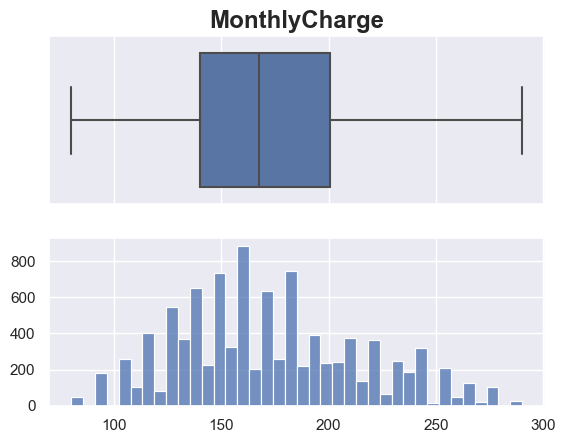

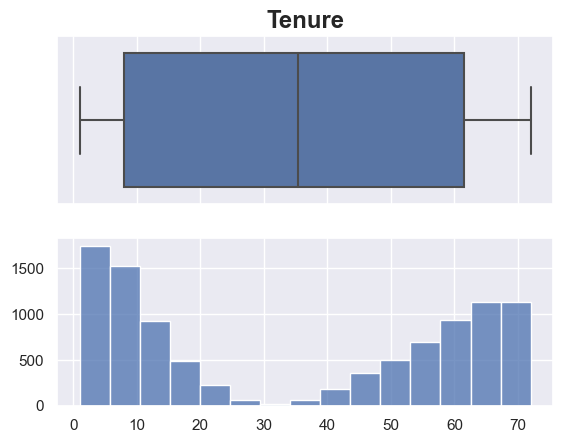

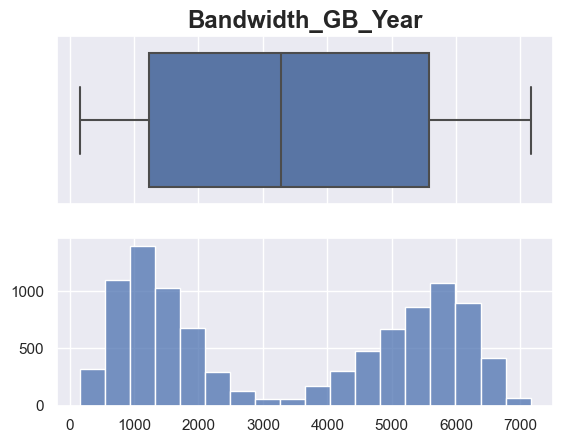

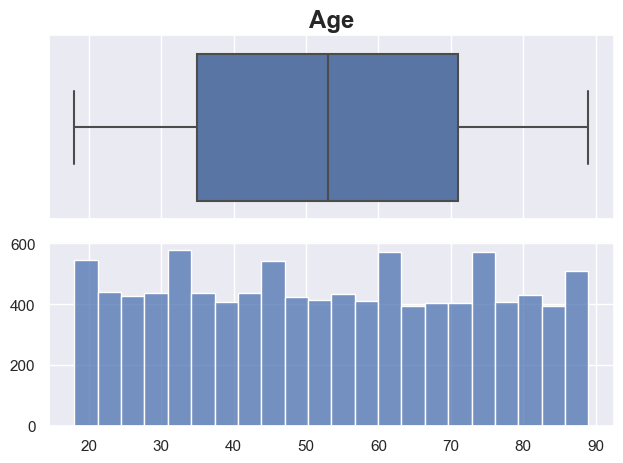

In [220]:
# charts showing that there are no outliers among these cols, per the results of find_outliers() above

create_charts(cols_without_outliers)

In [221]:
# these are the variables we'll focus our attention on since they have outlier values

cols_with_outliers

{'Children',
 'Contacts',
 'Email',
 'Income',
 'Outage_sec_perweek',
 'Population',
 'Yearly_equip_failure'}

In [222]:
# regardless of how a col to be handled, it will go in this dict

handle_values_dict = {} 
    # syntax:
        # {col_name}: {"mean"/"median"/"retain"/"exclude"/"remove"}

*Note--as the values in these columns are identical to how the were in D206, I have labeled how I treated these columns in D206.  A further explanation of why I chose to impute/exclude/ignore/remove can be found in my writeup for that PA*

Using **impute--median** for **Population**

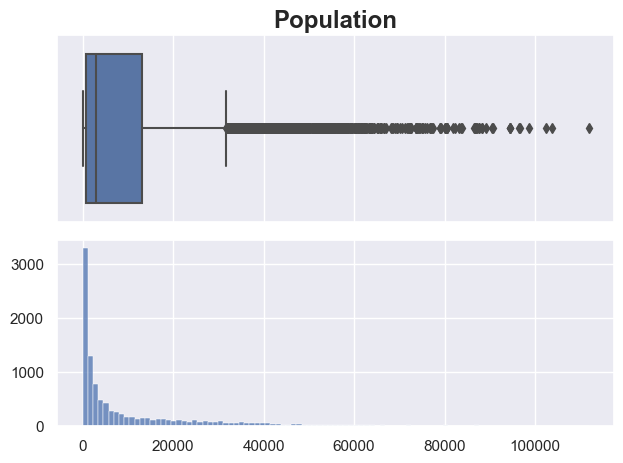

Population # of outliers: 937
     Num high: 937
     Num low: 0

Upper limit for Population: 31,813.00
Lower limit for Population: -17,907.00



(31813.0, -17907.0)

In [223]:
outlier_output_charts(["Population"])

In [224]:
handle_values_dict.update({"Population": "median"})
handle_values_dict

{'Population': 'median'}

Using **retain** for **Children**

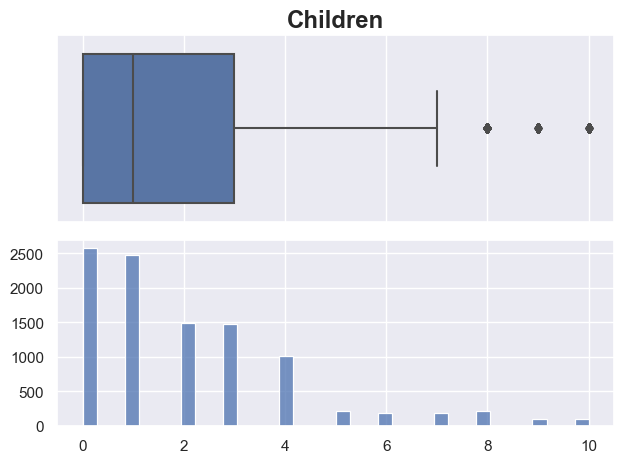

Children # of outliers: 401
     Num high: 401
     Num low: 0

Upper limit for Children: 7.50
Lower limit for Children: -4.50



(7.5, -4.5)

In [225]:
outlier_output_charts(["Children"])

In [226]:
handle_values_dict.update({"Children": "retain"})
handle_values_dict

{'Population': 'median', 'Children': 'retain'}

Using **retain** for **Income**

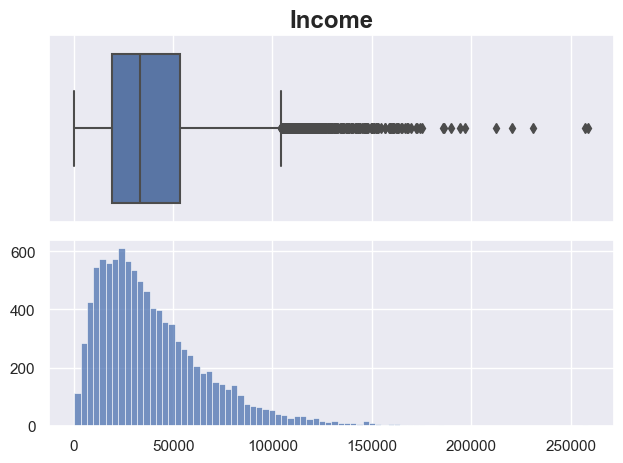

Income # of outliers: 336
     Num high: 336
     Num low: 0

Upper limit for Income: 104,278.35
Lower limit for Income: -31,807.46



(104278.34875, -31807.46125)

In [227]:
outlier_output_charts(["Income"])

In [228]:
handle_values_dict.update({"Income": "retain"})
handle_values_dict

{'Population': 'median', 'Children': 'retain', 'Income': 'retain'}

Using **impute--median** for **Outage_sec_perweek**

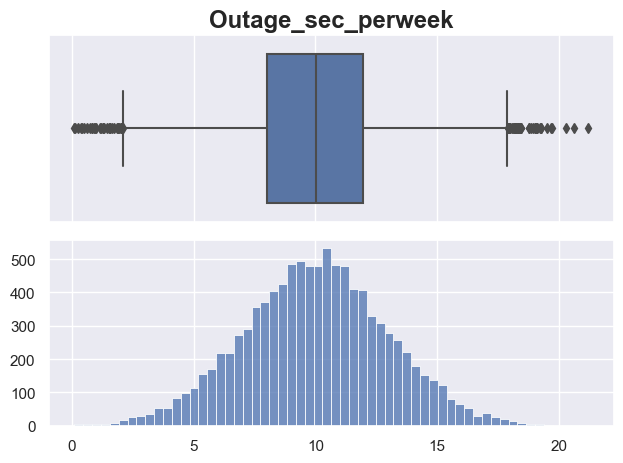

Outage_sec_perweek # of outliers: 76
     Num high: 43
     Num low: 33

Upper limit for Outage_sec_perweek: 17.90
Lower limit for Outage_sec_perweek: 2.09



(17.8963915, 2.0913075)

In [229]:
outlier_output_charts(["Outage_sec_perweek"])

In [230]:
handle_values_dict.update({"Outage_sec_perweek": "median"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median'}

Using **retain** for **Email**

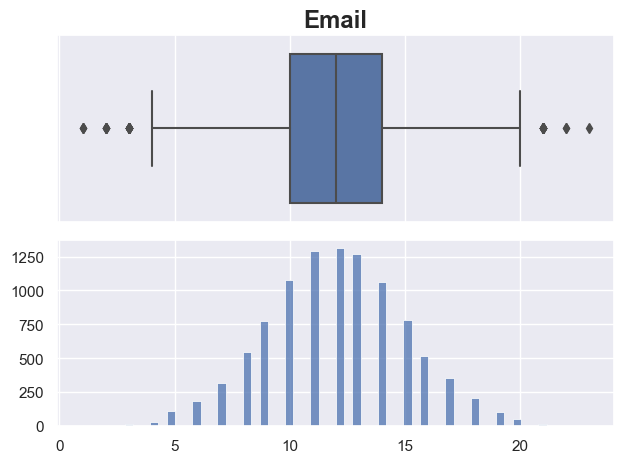

Email # of outliers: 38
     Num high: 15
     Num low: 23

Upper limit for Email: 20.00
Lower limit for Email: 4.00



(20.0, 4.0)

In [231]:
outlier_output_charts(["Email"])

In [232]:
handle_values_dict.update({"Email": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain'}

Using **retain** for **Contacts**

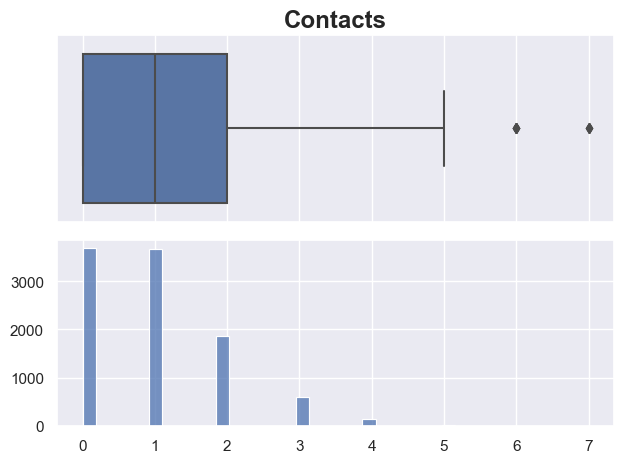

Contacts # of outliers: 8
     Num high: 8
     Num low: 0

Upper limit for Contacts: 5.00
Lower limit for Contacts: -3.00



(5.0, -3.0)

In [233]:
outlier_output_charts(["Contacts"])

In [234]:
handle_values_dict.update({"Contacts": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain'}

Using **retain** for **Yearly_equip_failure**

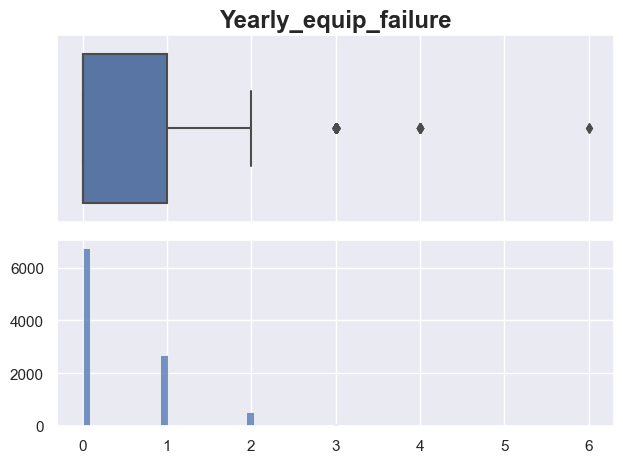

Yearly_equip_failure # of outliers: 94
     Num high: 94
     Num low: 0

Upper limit for Yearly_equip_failure: 2.50
Lower limit for Yearly_equip_failure: -1.50



(2.5, -1.5)

In [235]:
outlier_output_charts(["Yearly_equip_failure"])

In [236]:
handle_values_dict.update({"Yearly_equip_failure": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain',
 'Yearly_equip_failure': 'retain'}

Using **retain** for **MonthlyCharge**

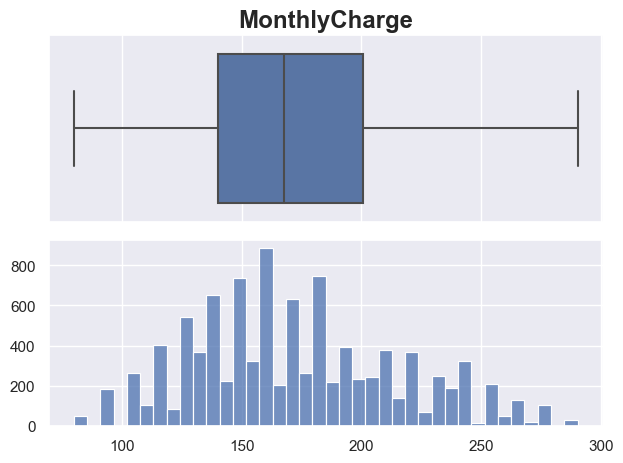

MonthlyCharge # of outliers: 0
     Num high: 0
     Num low: 0

Upper limit for MonthlyCharge: 291.87
Lower limit for MonthlyCharge: 48.85



(291.867954, 48.84601000000002)

In [237]:
outlier_output_charts(["MonthlyCharge"])

In [238]:
handle_values_dict.update({"MonthlyCharge": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain',
 'Yearly_equip_failure': 'retain',
 'MonthlyCharge': 'retain'}

In [239]:
# final result of handle_values_dict, which I will subsequently use to treat outlier values

handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain',
 'Yearly_equip_failure': 'retain',
 'MonthlyCharge': 'retain'}

In [240]:
# function that will parse dict to handle outlier values in main df while moving original values to separate df

new_cols_outliers_handled_set = set() # so we can iterate through this as necessary later on

def handle_outliers(handle_values_dict):
    """
    Handles one of the following per column:
        * leaves column be, as outliers have been deemed acceptable to retain
        * creates new column, imputing the outlying data points with the statistical method chosen by user while retaining all non-outlier values
        * excludes entire row outlier belongs to; removes said row from main df and puts it into a new df
        * removes entire row outlier belongs to from main df
    
    Args:
        * handle_values_dict (dict):
            * Before running this function, create a dict with all columns that have outliers you want to handle.
            * You will have to make a judgement call as to which of the following you want to do:
                * "retain" -- does not change any data within the col
                * "mean" -- imputes mean value from col
                * "median" -- imputes median value from col
                * "mode" -- imputes mode from col
                * "exclude" -- removes row from main df to a separate df
                * "remove" -- removes row from main df completely
          
        * Make sure that you are using the "no_nulls" col if there is both an original and modified col       
    """

    df_exclude = pd.DataFrame()

    for k, v in handle_values_dict.items():
        addnl_col = k + "_with_outliers"
        v = v.lower()
                
        condition = df.index.isin(outlier_dict[k]["Rows With Outliers"]) 
        
        if v == "retain":
            continue # no change to df since we're keeping everything
        
        if v == "mean" or v == "median":
            s_test = getattr(df[k], v) # need to do this since test is being passed as a kwarg # tip of the cap to https://stackoverflow.com/questions/31112742/why-should-i-ever-use-getattr
            s_test_val = s_test() # in order to actually create an instance of median() or mean()

            df_orphans[addnl_col] = df[k] # create new col in df_orphans and move over data with outliers to it # tip of the cap to https://datagy.io/pandas-conditional-column/ for using df.loc[] and conditions
            
            df.loc[condition, k] = s_test_val # fill in any outliers found within col with mean/median as specified in function call
            
            new_cols_outliers_handled_set.add(addnl_col) # add to set to keep track of outlier cols created
            
        if v == "exclude":
            excluded_rows = df.loc[condition].copy() # grab all rows that fit condition above since they will be added to df_orphans, then 
            
            df_exclude = pd.concat([df_exclude, excluded_rows]) # tip of the cap to https://stackoverflow.com/questions/67139564/concatenate-dataframe-in-pandas
            df.drop(index=excluded_rows.index, inplace=True)

        if v == "remove":
            df.drop(index = df.loc[condition].index, inplace=True) # delete inplace
   
    return df_exclude # we'll be able to see this upon output, and we can assign the funciton call to a variable as desired

In [241]:
# handle outliers using function above--only df_exclude will receive original values, treatments will be within original df or removed from df completely

df_exclude = handle_outliers(handle_values_dict)
df_exclude

""


In [242]:
# handle_values_dict, identifies rows that contain outlier values in at least one column

outlier_dict

{'Population': {'IQR': 12430.0,
  'Lower Limit (Q1 * -1.5)': -17907.0,
  'Upper Limit (Q3 * 1.5)': 31813.0,
  'Rows With Outliers': [12,
   17,
   30,
   45,
   52,
   57,
   58,
   67,
   75,
   86,
   88,
   91,
   101,
   103,
   111,
   121,
   124,
   142,
   157,
   158,
   164,
   172,
   204,
   213,
   216,
   218,
   232,
   241,
   242,
   257,
   258,
   260,
   263,
   276,
   286,
   292,
   315,
   324,
   352,
   353,
   361,
   373,
   380,
   385,
   386,
   395,
   427,
   433,
   437,
   442,
   443,
   446,
   465,
   469,
   499,
   529,
   530,
   556,
   559,
   578,
   588,
   590,
   593,
   599,
   605,
   622,
   645,
   647,
   656,
   663,
   739,
   741,
   745,
   748,
   772,
   775,
   780,
   802,
   822,
   830,
   837,
   838,
   852,
   856,
   870,
   891,
   898,
   907,
   970,
   986,
   991,
   1002,
   1044,
   1086,
   1097,
   1108,
   1114,
   1132,
   1151,
   1157,
   1160,
   1163,
   1174,
   1187,
   1192,
   1196,
   1212,
   1219,
 

In [243]:
# shows newly-created df where values prior to outlier treatment have been moved to

df_orphans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Population_with_outliers          10000 non-null  int64  
 1   Outage_sec_perweek_with_outliers  10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.4 KB


In [244]:
# identifying all cols with missing values

cols_with_missing_values_list

[]

In [245]:
# identifying all cols with outliers

cols_with_outliers

{'Children',
 'Contacts',
 'Email',
 'Income',
 'Outage_sec_perweek',
 'Population',
 'Yearly_equip_failure'}

In [246]:
# creating a set with all cols that have been treated up to this point so we can double-check they were handled properly

cols_handled = set(cols_with_missing_values_list).union(cols_with_outliers)
cols_handled

{'Children',
 'Contacts',
 'Email',
 'Income',
 'Outage_sec_perweek',
 'Population',
 'Yearly_equip_failure'}

In [247]:
# viewing df_orphans alphabetically

df_orphans[sorted(df_orphans.columns.tolist())].info() # tip of the cap to https://learnpython.com/blog/sort-alphabetically-in-python/

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Outage_sec_perweek_with_outliers  10000 non-null  float64
 1   Population_with_outliers          10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 234.4 KB


In [248]:
# displaying cols where outliers were not ignored

new_cols_outliers_handled_set

{'Outage_sec_perweek_with_outliers', 'Population_with_outliers'}

In [249]:
# create dictionary containing all quantitative cols where values were not *ignored*

final_viz_dict = {}

for col_base in set(df.columns.tolist()):
    
    if col_base not in quant_cols:
        continue
    
    if col_base + "_with_nulls" in new_cols_nulls_removed_set:
        col_null = col_base + "_with_nulls"
        
        if col_base not in final_viz_dict:
            final_viz_dict[col_base] = [col_null]
            
        else:
            final_viz_dict[col_base].append(col_null)
        
    if col_base + "_with_outliers" in new_cols_outliers_handled_set:
        col_out = col_base + "_with_outliers"
        
        if col_base not in final_viz_dict:
            final_viz_dict[col_base] = [col_out]
        
        else:
            final_viz_dict[col_base].append(col_out)            


In [250]:
# all of the original quantitative columns

quant_cols

['Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [251]:
# the columns that we ended up handling nulls and/or outliers in

final_viz_dict

{'Outage_sec_perweek': ['Outage_sec_perweek_with_outliers'],
 'Population': ['Population_with_outliers']}

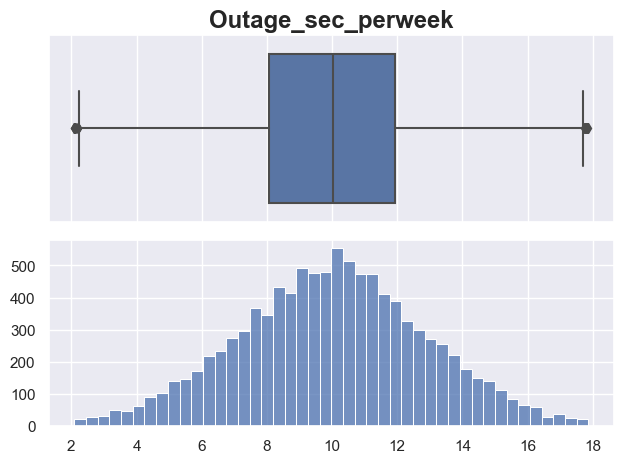

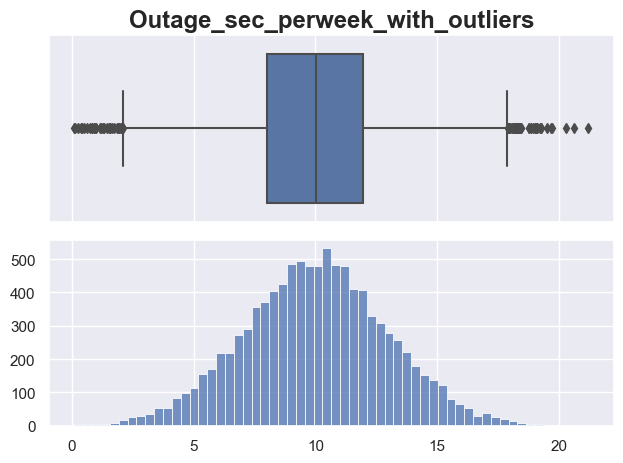

               Original median value: 10.01856
               Cleaned median value: 10.01856



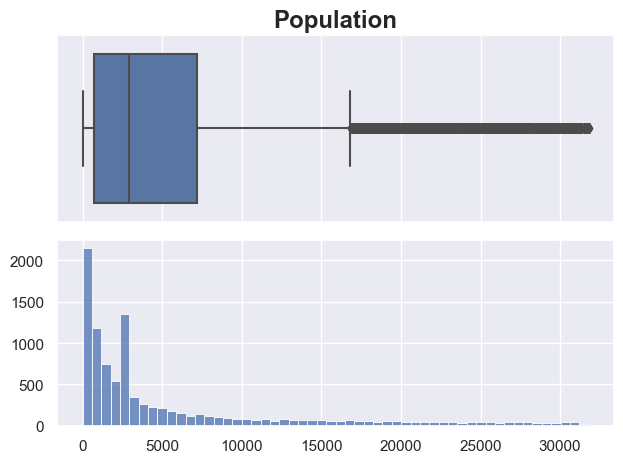

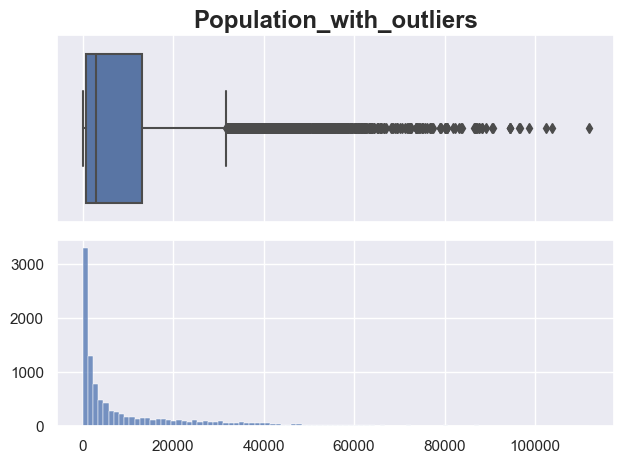

               Original median value: 2910.5
               Cleaned median value: 2909.75



In [252]:
# for quantitative columns where values were not *ignored*, graph pre-treatment values against post-treatement values
 
for k, val in final_viz_dict.items():
    for v in val:    
        create_charts([k])
        create_charts(val, df=df_orphans)
    
        print(f'               Original median value: {df_orphans[[v]].describe().loc[["50%"]].iloc[0,0]}') # tip of the cap to https://www.statology.org/pandas-describe-only-mean-std/
        print(f'               Cleaned median value: {df[[k]].describe().loc[["50%"]].iloc[0,0]}')
        print("")

##### Determine binary variables, set dependent variable, create base list of independent variables to analyze 

In [253]:
df_orig.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Survey_TimelyResponse',
       'Survey_TimelyFixes', 'Survey_TimelyReplacements', 'Survey_Reliability',
       'Survey_Options', 'Survey_RespectfulResponse',
       'Survey_CourteousExchange', 'Survey_ActiveListening'],
      dtype='object')

In [254]:
for col in df_orig.columns:
    
    
    print(f"{col}, {len(df_orig[col].value_counts())}")
#     print(col)

Customer_id, 10000
Interaction, 10000
UID, 10000
City, 6058
State, 52
County, 1620
Zip, 8583
Lat, 8563
Lng, 8630
Population, 5152
Area, 3
TimeZone, 25
Job, 639
Children, 11
Age, 72
Income, 9993
Marital, 5
Gender, 3
Churn, 2
Outage_sec_perweek, 9911
Email, 23
Contacts, 8
Yearly_equip_failure, 6
Techie, 2
Contract, 3
Port_modem, 2
Tablet, 2
InternetService, 3
Phone, 2
Multiple, 2
OnlineSecurity, 2
OnlineBackup, 2
DeviceProtection, 2
TechSupport, 2
StreamingTV, 2
StreamingMovies, 2
PaperlessBilling, 2
PaymentMethod, 4
Tenure, 9996
MonthlyCharge, 750
Bandwidth_GB_Year, 10000
Survey_TimelyResponse, 7
Survey_TimelyFixes, 7
Survey_TimelyReplacements, 8
Survey_Reliability, 7
Survey_Options, 7
Survey_RespectfulResponse, 8
Survey_CourteousExchange, 7
Survey_ActiveListening, 8


In [255]:
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Survey_TimelyResponse,Survey_TimelyFixes,Survey_TimelyReplacements,Survey_Reliability,Survey_Options,Survey_RespectfulResponse,Survey_CourteousExchange,Survey_ActiveListening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38.0,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446.0,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735.0,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863.0,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352.0,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


***end of cleaning needed for current task***

*One-hot encoding not needed since this Task will not use categorical data, only continuous data*

### Handling D212-related nuances

#### Identifying continuous variables

i.e. *remove columns that are categorical in nature*

In [272]:
# remove all columns that are not either float or integer dtypes

# df.info()

# continuous_vars = ["Customer_id"]
continuous_vars = []

for c in df.columns:
    if df[c].dtype == "float64" or df[c].dtype == "int64":
        continuous_vars.append(c)

continuous_vars

['Zip',
 'Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Survey_TimelyResponse',
 'Survey_TimelyFixes',
 'Survey_TimelyReplacements',
 'Survey_Reliability',
 'Survey_Options',
 'Survey_RespectfulResponse',
 'Survey_CourteousExchange',
 'Survey_ActiveListening']

#### Manually remove all variables that are *technically* continuous, but not really in this case

In [273]:
# manually create list

not_actually_continuous = [
    "Zip",
    "Lat",
    "Lng", 
]

In [274]:
# remove values in list above from prevously-filtered columns

actually_continuous = [c for c in continuous_vars if c not in not_actually_continuous]

actually_continuous

['Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Survey_TimelyResponse',
 'Survey_TimelyFixes',
 'Survey_TimelyReplacements',
 'Survey_Reliability',
 'Survey_Options',
 'Survey_RespectfulResponse',
 'Survey_CourteousExchange',
 'Survey_ActiveListening']

In [275]:
df_continuous = df[actually_continuous]
df_continuous

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Survey_TimelyResponse,Survey_TimelyFixes,Survey_TimelyReplacements,Survey_Reliability,Survey_Options,Survey_RespectfulResponse,Survey_CourteousExchange,Survey_ActiveListening
CaseOrder,,,,,,,,,,,,,,,,,,,
1,38.0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,10446.0,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,3735.0,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,13863.0,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,11352.0,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,640.0,3,23,55723.74,9.415935,12,2,0,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,2910.5,4,48,34129.34,6.740547,15,2,0,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,406.0,1,48,45983.43,6.590911,10,0,0,47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5


#### 4.  Provide a copy of the cleaned data set.

In [278]:
# save cleaned data set to csv

df_continuous.to_csv("C:/Users/nick_/_WGU/D212/Jupyter Notebook/churn_data_clean_parker_task1.csv")
print("Successfully saved to CSV")

Successfully saved to CSV


# Part IV: Analysis

### D.  Perform the data analysis, and report on the results by doing the following:

#### 1.  Determine the optimal number of clusters in the data set, and describe the method used to determine this number.

**4** clusters is the optimal number, as calculated using the Elbow Method.  The Elbow Method iteratively calculates the within-cluster sum of squares (WCSS) value for a given range of clusters [cite this](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/).  The WCSS value is defined as the sum of squared differences between each datapoint and an optimally-placed number of k-centroids in an equilibrium state [cite this](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/).  

Using the StandardScaler() sklearn method, I first standardized a stripped-down version of the main *df* dataframe that contained the subset of columns that were both continuous *and* meaningful.

From there I ran a loop that calculated the WCSS score for each number of variables in the stripped-down dataframe, so from 1 to 19.  I took these values and added them to a dictionary I created to store the number of clusters and the WCSS score.

I then plotted out the relationship between WCSS score and number of clusters.  When using the Elbow Method, the best practice is to look for the point on the graph at which there is a perceivable 'bend' in the slope of the line, as though you were looking at an elbow joint [cite this](https://www.youtube.com/watch?v=zQfEc7vA1gU).  As shown on the graph below, the bend is most prominent at the 4-cluster mark.

#### Using StandardScaler() to eliminate any bias caused by the range of some columns (such as Income) being larger than the range of other columns (such as Age)

In [276]:
# import and initiate StandardScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [327]:
df_continuous_scaled = scaler.fit_transform(df_continuous[actually_continuous])
df_continuous_scaled

array([[-0.75357277, -0.97233791,  0.72092524, ...,  0.48638938,
        -0.49540563,  0.49038392],
       [ 0.62653277, -0.50659192, -1.25995716, ..., -0.48116458,
         0.47693123,  0.49038392],
       [-0.26334889,  0.89064606, -0.14873045, ..., -0.48116458,
        -0.49540563, -0.48182845],
       ...,
       [-0.7047758 , -0.50659192, -0.24535886, ...,  0.48638938,
         0.47693123,  1.46259628],
       [-0.37267796, -0.50659192, -0.6801867 , ..., -0.48116458,
         1.44926808,  0.49038392],
       [ 0.86309198, -0.50659192, -1.21164295, ..., -0.48116458,
         0.47693123, -2.42625317]])

#### Determine optimal number of clusters 
cite this[https://www.youtube.com/watch?v=FqIGui0rwh4]

In [328]:
# import relevant methods

# import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [329]:
# calculate 

cluster_dict = dict()

num_cols = range(1, len(df_continuous.columns)+1)

for c in num_cols:
    kmeans = KMeans(n_clusters=c, init="k-means++", n_init="auto")
    kmeans = kmeans.fit(df_continuous_scaled)
    
    wss_iter = kmeans.inertia_
    
#     print(f"#clusters: {c}")
#     print(f"inertia: {wss_iter}")
#     print("")
    
    cluster_dict[c] = wss_iter
    
cluster_dict

{1: 189999.99999999983,
 2: 170986.82135803803,
 3: 159983.93185122416,
 4: 152668.83790564808,
 5: 149330.0647246911,
 6: 145735.5569005391,
 7: 143164.0386041153,
 8: 140143.6239390109,
 9: 138584.0934533919,
 10: 137203.9180345898,
 11: 134379.10387537803,
 12: 133148.15012379864,
 13: 131256.86015481714,
 14: 129387.16254746688,
 15: 129112.06356107196,
 16: 127059.04801044277,
 17: 125691.92114136493,
 18: 124894.58218624456,
 19: 124538.75125773979}

''

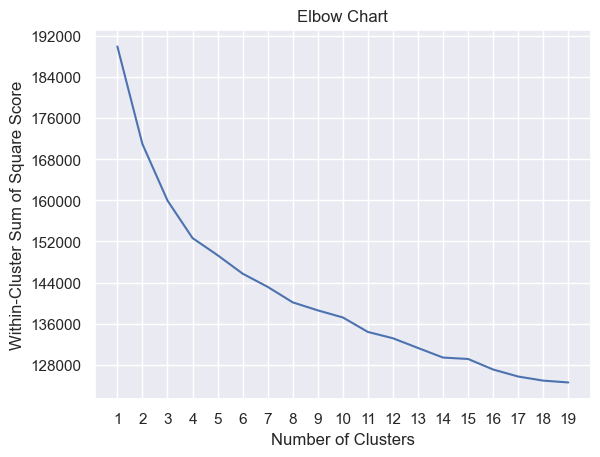

In [330]:
# extra bits needed to pretty-ify graph in next slide

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

sns.lineplot(x = cluster_dict.keys(), y = cluster_dict.values())

# to set ticks as integers-only


for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True)) # thank you to https://stackoverflow.com/questions/27496737/display-only-whole-numbers-on-the-y-axis
    ax.set_xticks(num_cols)


ax.set(xlabel="Number of Clusters", ylabel="Within-Cluster Sum of Square Score", title="Elbow Chart") # thanks https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot

;

# cite this: https://www.kaggle.com/code/funxexcel/p2-sklearn-k-means-elbow-and-silhouette-method

#### 2.  Provide the code used to perform the clustering analysis technique.

# Part V: Data Summary and Implications

### E.  Summarize your data analysis by doing the following:

#### 1.  Explain the quality of the clusters created.

#### 2.  Discuss the results and implications of your clustering analysis.

#### 3.  Discuss one limitation of your data analysis.

#### 4.  Recommend a course of action for the real-world organizational situation from part A1 based on the results and implications discussed in part E2.

# Part VI: Demonstration

### F.  Provide a Panopto video recording that includes the presenter and a vocalized demonstration showing all code used, the code being executed, and the results of all code used in the task.

# G.  Record the web sources you used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

# H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.